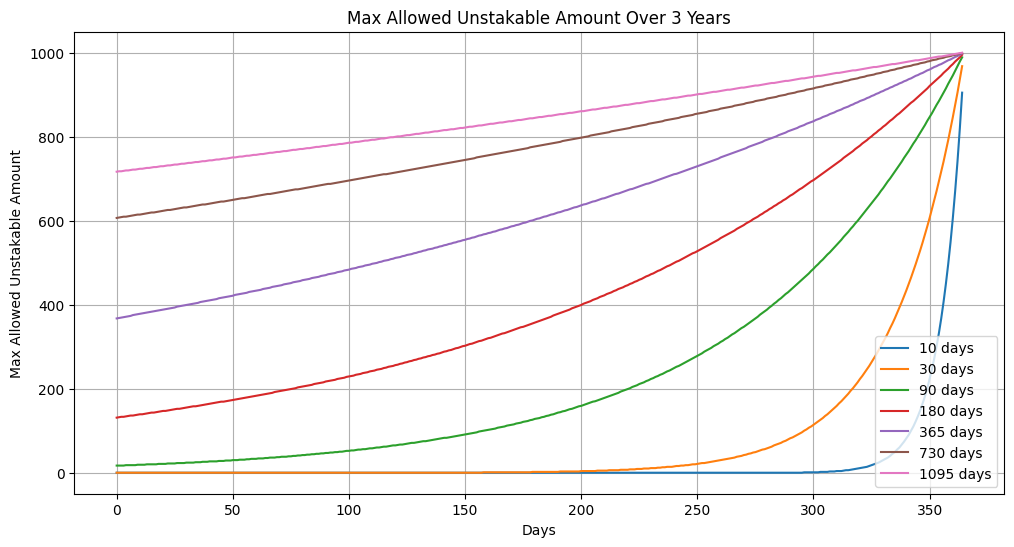

In [33]:
import math

def calculate_conviction(lock_amount: int, end_day: int, current_day: int, interval: int) -> int:
    lock_duration = max(end_day - current_day, 0)
    time_factor = -lock_duration / interval 
    exp_term = 1 - math.exp(time_factor)
    conviction_score = lock_amount * exp_term
    return int(conviction_score)


def calculate_max_allowed_unstakable(alpha_locked: int, end_day: int, current_day: int, interval: int) -> int:
    return alpha_locked - calculate_conviction(alpha_locked, end_day=end_day, current_day = current_day, interval=interval)
    

import matplotlib.pyplot as plt

# Define intervals from 10 days to 3 years
intervals = [10, 30, 90, 180, 365, 365*2, 365*3]

# Generate data for 3 years (assuming 1 block per day for simplicity)
days = range(0, 365)

# Create the plot
plt.figure(figsize=(12, 6))

for interval in intervals:
    unstakable_amounts = [calculate_max_allowed_unstakable(1000, 365, day, interval=interval) for day in days]
    plt.plot(days, unstakable_amounts, label=f'{interval} days')

plt.title('Max Allowed Unstakable Amount Over 3 Years')
plt.xlabel('Days')
plt.ylabel('Max Allowed Unstakable Amount')
plt.legend()
plt.grid(True)
plt.show()

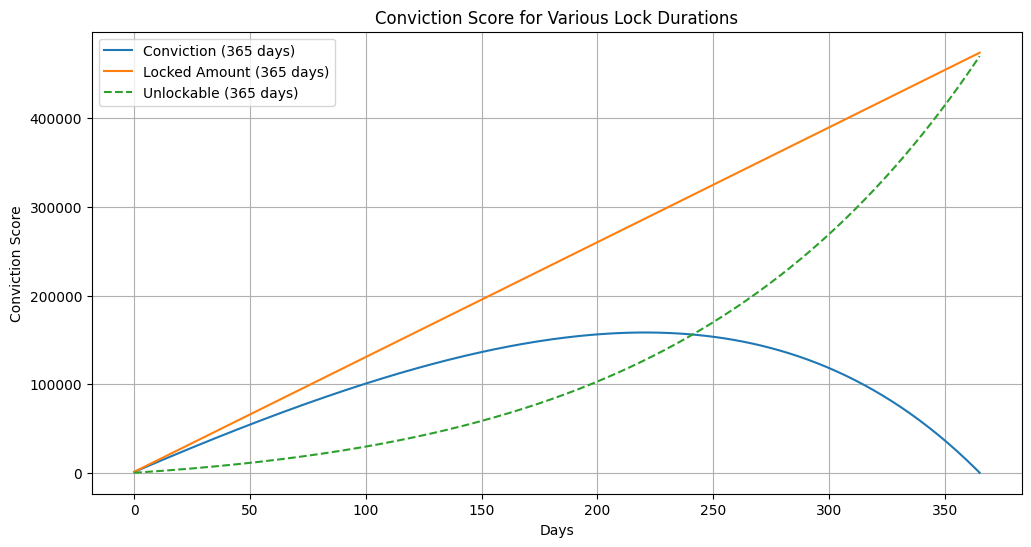

In [84]:
import math

def calculate_conviction(lock_amount: int, end_day: int, current_day: int, interval: int) -> int:
    lock_duration = max(end_day - current_day, 0)
    time_factor = -lock_duration / interval 
    exp_term = 1 - math.exp(time_factor)
    conviction_score = lock_amount * exp_term
    return int(conviction_score)

# Calculate conviction for 1000 over a range of durations from 10 days to a year
lock_amount = 1000
interval = 180
duration = 365

plt.figure(figsize=(12, 6))

unlockable = [0]
days = range(0, duration + 1)  # +1 to include the last day
locked_amount = []
convictions = []
unlockable = [0]
for day in days:
    current_locked = lock_amount + (7200 * 0.18 * day) - unlockable[day-1] * 0
    locked_amount.append(current_locked)
    conviction = calculate_conviction(current_locked, duration, day, interval=interval)
    convictions.append(conviction)
    unlockable.append(current_locked - conviction)

plt.plot(days, convictions, label=f'Conviction ({duration} days)')
plt.plot(days, locked_amount, label=f'Locked Amount ({duration} days)')
plt.plot(days, unlockable[:-1], label=f'Unlockable ({duration} days)', linestyle='--')

plt.title('Conviction Score for Various Lock Durations')
plt.xlabel('Days')
plt.ylabel('Conviction Score')
plt.grid(True)
plt.legend()
plt.show()




Lion's Share Distribution:
Participant_0's lock: 6974, share: 0.0072
Participant_1's lock: 9165, share: 0.8613
Participant_2's lock: 8303, share: 0.1312
Participant_3's lock: 5278, share: 0.0002
Participant_4's lock: 2642, share: 0.0000
Participant_5's lock: 4272, share: 0.0000
Participant_6's lock: 4160, share: 0.0000
Participant_7's lock: 2101, share: 0.0000
Participant_8's lock: 3090, share: 0.0000
Participant_9's lock: 4980, share: 0.0001

Lion's Share Skew Factors:
Participant_0's skew factor: 0.0528
Participant_1's skew factor: 4.7893
Participant_2's skew factor: 0.8054
Participant_3's skew factor: 0.0017
Participant_4's skew factor: 0.0000
Participant_5's skew factor: 0.0002
Participant_6's skew factor: 0.0002
Participant_7's skew factor: 0.0000
Participant_8's skew factor: 0.0000
Participant_9's skew factor: 0.0010


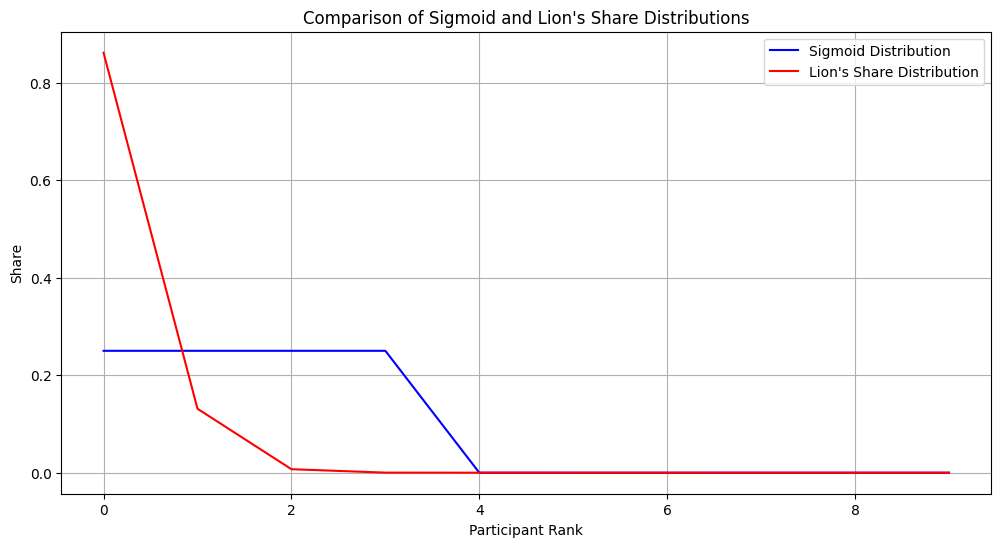

In [124]:

def calculate_conviction(lock_amount: int, end_day: int, current_day: int, interval: int) -> int:
    lock_duration = max(end_day - current_day, 0)
    time_factor = -lock_duration / interval 
    exp_term = 1 - math.exp(time_factor)
    conviction_score = lock_amount * exp_term
    return int(conviction_score)


import random

interval = 365
duration = 365
N = 10  # Number of participants
temperature = 5  # Adjust this value to control the steepness of the sigmoid

# Generate random lock amounts for N participants
participants = [f"Participant_{i}" for i in range(N)]
locks = [random.randint(10, 10000) for _ in range(N)]

# Calculate convictions
convictions = [calculate_conviction(lock, duration, 0, interval) for lock in locks]

# Calculate mean conviction
mean_conviction = sum(convictions) / len(convictions)

# Calculate powered convictions using sigmoid function
powered_convictions = [1 / (1 + math.exp(-(conv - mean_conviction) / temperature)) for conv in convictions]

# Calculate total powered conviction
total_powered = sum(powered_convictions)

# Calculate shares
shares = [powered / total_powered for powered in powered_convictions]

# # Print results
# for i, (participant, lock, share) in enumerate(zip(participants, locks, shares)):
#     print(f"{participant}'s lock: {lock}, share: {share:.4f}")

# # Calculate and print skew factors
# base_ratio = locks[0] / sum(locks)
# for i, (participant, lock, share) in enumerate(zip(participants, locks, shares)):
#     skew_factor = (share / base_ratio) / (lock / locks[0])
#     print(f"{participant}'s skew factor: {skew_factor:.4f}")


import numpy as np

# Function to calculate the "lion's share" distribution
def calculate_lions_share(convictions, sharpness=20):
    # Normalize convictions
    normalized_convictions = np.array(convictions) / np.max(convictions)
    
    # Apply exponential function to create a sharp drop-off
    powered_convictions = np.exp(sharpness * (normalized_convictions - 1))
    
    # Calculate shares
    total_powered = np.sum(powered_convictions)
    shares = powered_convictions / total_powered
    
    return shares

# Calculate convictions
convictions = [calculate_conviction(lock, duration, 0, interval) for lock in locks]

# Calculate shares using the lion's share distribution
lions_shares = calculate_lions_share(convictions)

# Print results
print("\nLion's Share Distribution:")
for i, (participant, lock, share) in enumerate(zip(participants, locks, lions_shares)):
    print(f"{participant}'s lock: {lock}, share: {share:.4f}")

# Calculate and print skew factors for lion's share
base_ratio = locks[0] / sum(locks)
print("\nLion's Share Skew Factors:")
for i, (participant, lock, share) in enumerate(zip(participants, locks, lions_shares)):
    skew_factor = (share / base_ratio) / (lock / locks[0])
    print(f"{participant}'s skew factor: {skew_factor:.4f}")

# Visualize the difference between sigmoid and lion's share distributions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(N), sorted(shares, reverse=True), 'b-', label='Sigmoid Distribution')
plt.plot(range(N), sorted(lions_shares, reverse=True), 'r-', label="Lion's Share Distribution")
plt.xlabel('Participant Rank')
plt.ylabel('Share')
plt.title('Comparison of Sigmoid and Lion\'s Share Distributions')
plt.legend()
plt.grid(True)
plt.show()




Lion's Share Distribution:
Participant_0's lock: 3916, share: 0.0015
Participant_1's lock: 440, share: 0.0000
Participant_2's lock: 8807, share: 0.3472
Participant_3's lock: 8077, share: 0.1545
Participant_4's lock: 6539, share: 0.0281
Participant_5's lock: 6470, share: 0.0260
Participant_6's lock: 148, share: 0.0000
Participant_7's lock: 701, share: 0.0000
Participant_8's lock: 2765, share: 0.0004
Participant_9's lock: 9026, share: 0.4422

Lion's Share Skew Factors:
Participant_0's skew factor: 0.0184
Participant_1's skew factor: 0.0035
Participant_2's skew factor: 1.8483
Participant_3's skew factor: 0.8967
Participant_4's skew factor: 0.2016
Participant_5's skew factor: 0.1886
Participant_6's skew factor: 0.0075
Participant_7's skew factor: 0.0029
Participant_8's skew factor: 0.0073
Participant_9's skew factor: 2.2970


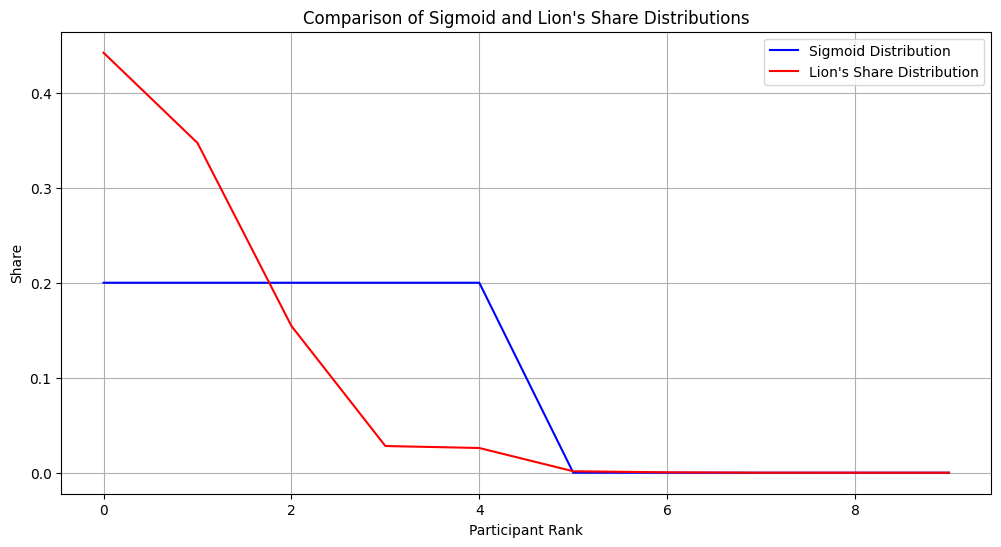

In [121]:
import numpy as np

# Function to calculate the "lion's share" distribution
def calculate_lions_share(convictions, sharpness=10):
    # Normalize convictions
    normalized_convictions = np.array(convictions) / np.max(convictions)
    
    # Apply exponential function to create a sharp drop-off
    powered_convictions = np.exp(sharpness * (normalized_convictions - 1))
    
    # Calculate shares
    total_powered = np.sum(powered_convictions)
    shares = powered_convictions / total_powered
    
    return shares

# Calculate convictions
convictions = [calculate_conviction(lock, duration, 0, interval) for lock in locks]

# Calculate shares using the lion's share distribution
lions_shares = calculate_lions_share(convictions)

# Print results
print("\nLion's Share Distribution:")
for i, (participant, lock, share) in enumerate(zip(participants, locks, lions_shares)):
    print(f"{participant}'s lock: {lock}, share: {share:.4f}")

# Calculate and print skew factors for lion's share
base_ratio = locks[0] / sum(locks)
print("\nLion's Share Skew Factors:")
for i, (participant, lock, share) in enumerate(zip(participants, locks, lions_shares)):
    skew_factor = (share / base_ratio) / (lock / locks[0])
    print(f"{participant}'s skew factor: {skew_factor:.4f}")

# Visualize the difference between sigmoid and lion's share distributions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(N), sorted(shares, reverse=True), 'b-', label='Sigmoid Distribution')
plt.plot(range(N), sorted(lions_shares, reverse=True), 'r-', label="Lion's Share Distribution")
plt.xlabel('Participant Rank')
plt.ylabel('Share')
plt.title('Comparison of Sigmoid and Lion\'s Share Distributions')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
import math

def calculate_conviction(lock_amount: int, end_day: int, current_day: int, interval: int) -> int:
    lock_duration = max(end_day - current_day, 0)
    time_factor = -lock_duration / interval 
    exp_term = 1 - math.exp(time_factor)
    conviction_score = lock_amount * exp_term
    return int(conviction_score)


lock = 1000
calculate_conviction(lock, 365, 100, 180)


770